<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn

In [ ]:
!pip install pyarrow

En este ciclo se leen los archivos que contienen las temperaturas mínimas, medias y máximas por año

In [ ]:
import pandas as pd

Tmin = {}
Tmax = {}
Tmed = {}

for i in range(1985,2021):
  url1 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/Tmin/%dTmin.xlsx?raw=true" % i
  Tmin[i] = pd.read_excel(url1, header = 1)
  url2 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/Tmax/%dTmax.xlsx?raw=true" % i
  Tmax[i] = pd.read_excel(url2, header = 1)              
  url3 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/Tmed/%dTmed.xlsx?raw=true" % i
  Tmed[i] = pd.read_excel(url3, header = 1) 


KeyboardInterrupt: ignored

Se guardan en dataframes distintos, los datos de cada estado, uno con las temperaturas mínimas por año y otro con las máximas (66 DataFrames en total, ya que también se realiza el de 'nacional')

---



In [ ]:
import pandas as pd

tmin_todasentidades = {}
tmax_todasentidades = {}
tmed_todasentidades = {}

#Se guarda en un arreglo los dataframes con las temperaturas mínimas, medias y máximas de todos los estados, con un dataframe distinto por año
for i in range (1985, 2021):
  tmax_todasentidades[i] = pd.DataFrame (Tmax[i]) #columns = {'ENTIDAD', 'ANUAL'})
  tmin_todasentidades[i] = pd.DataFrame (Tmin[i])
  tmed_todasentidades[i] = pd.DataFrame (Tmed[i])

estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']
#Se guardan en una lista los nombres de los estados tal y como vienen en el archivo inicial.
df = pd.DataFrame(Tmax[1985])
estados_comp = df['ENTIDAD'].tolist()

anios = range(1985, 2021) #Lista con los años de los dataframe
tmin_por_entidad = {}
tmax_por_entidad = {}
tmed_por_entidad = {}

#Ciclo para guardar los datos de cada estado.
for i in range(33):
  df_min_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL']) #Dataframe en el que se guardará los datos de un solo estado.
  df_max_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'])
  df_med_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'])
  
  for j in range (1985, 2021):
    l = j - 1985 #Variable para guardar el año
   
    dfmin = pd.DataFrame (tmin_todasentidades[j])    
    dfmax = pd.DataFrame(tmax_todasentidades[j]) #columns = {'ANIO', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'}) #Se crea un dataframe con las columnas de 'Año' y 'Anual'
    dfmed = pd.DataFrame (tmed_todasentidades[j])
   
    df_min_entidad = df_min_entidad.append(dfmin.loc[i], ignore_index=True) #Se copia la fila con los datos del estado correspondiente al nuevo dataframe
    df_max_entidad = df_max_entidad.append(dfmax.loc[i], ignore_index=True)
    df_med_entidad = df_med_entidad.append(dfmed.loc[i], ignore_index=True)
   
    df_min_entidad.at[l, 'ENTIDAD'] = anios[l] #Se guarda el número del año correspondiente en el dataframe
    df_max_entidad.at[l, 'ENTIDAD'] = anios[l]
    df_med_entidad.at[l, 'ENTIDAD'] = anios[l]
  
  df_min_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True)
  df_max_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True) 
  df_med_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True) 

  tmin_por_entidad[estados_abv[i]] = df_min_entidad
  tmax_por_entidad[estados_abv[i]] = df_max_entidad #Se guarda en el diccionario de las temperaturas por entidad el dataframe creado en el ciclo, identificado por la abreviatura de la entidad
  tmed_por_entidad[estados_abv[i]] = df_med_entidad

In [ ]:

print (tmin_por_entidad['NAC'])
print (tmax_por_entidad['SIN'])


     AÑO        ENE        FEB  ...        NOV        DIC      ANUAL
0   1985   7.995534   8.918779  ...  11.055804   9.244794  12.984091
1   1986   7.578413   9.166274  ...  12.024500   9.446455  13.027165
2   1987   7.519999   8.954563  ...  10.699737   9.627296  12.814918
3   1988   7.870151   9.495767  ...  10.847616   9.065313  12.991370
4   1989   9.107985   9.257366  ...  11.664921   8.487009  12.882815
5   1990   9.222580   9.610964  ...  11.517754   9.060314  13.365940
6   1991   9.139926   9.846789  ...  10.758246  10.329867  13.297236
7   1992   9.633963   9.344612  ...  11.244242  10.078912  13.297342
8   1993   9.816045   9.526274  ...  11.529239   9.416090  13.160741
9   1994   8.737544   9.895301  ...  12.172426  10.588145  13.474506
10  1995   9.094192  10.512600  ...  11.857846   9.442642  13.481103
11  1996   7.392487   9.483176  ...  10.762294   9.098409  12.961110
12  1997   8.003899   9.454244  ...  11.760791   8.427468  13.054715
13  1998   8.217383   8.057007  ..

Se guardan los dataframes de las Temperaturas Mínimas como archivos .csv y se descargan

In [ ]:

i = 0
for estado in estados_abv:
  df = tmin_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Mínimas %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se guardan los dataframes de las Temperaturas Máximas como archivos .csv y se descargan

In [ ]:
i = 0
for estado in estados_abv:
  df = tmax_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Máximas %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se guardan los dataframes de las Temperaturas Medias como archivos .csv y se descargan

In [ ]:
i = 0
for estado in estados_abv:
  df = tmed_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Medias %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se limpia el archivo .csv con los datos de las precipitaciones


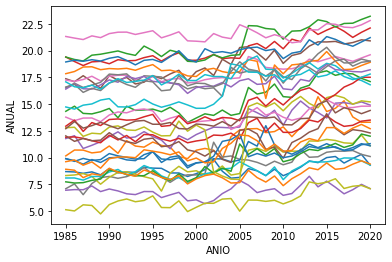

In [ ]:
import seaborn as sns

for i in estados_abv:
  df = pd.DataFrame(tmin_por_entidad[i])
  sns.lineplot(data=df, x="ANIO", y="ANUAL")

